# Machine Learning Exercises

---------------

# Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

# Solution 1

In [87]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import Adam, SGD

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# Load the dataset

housing = pd.read_csv('housing-data.csv')

df = housing.copy()

df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [3]:
df.shape

(47, 4)

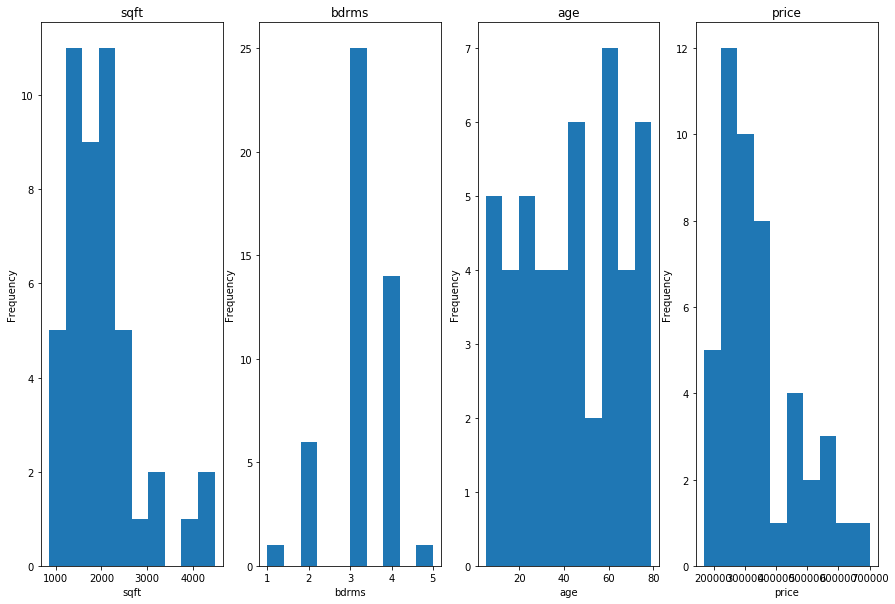

In [4]:
# plot the histograms for each feature

plt.figure(figsize = (15, 10))

for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1, 4, i + 1)
    df[feature].plot(kind = 'hist', title = feature)
    plt.xlabel(feature);

In [5]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

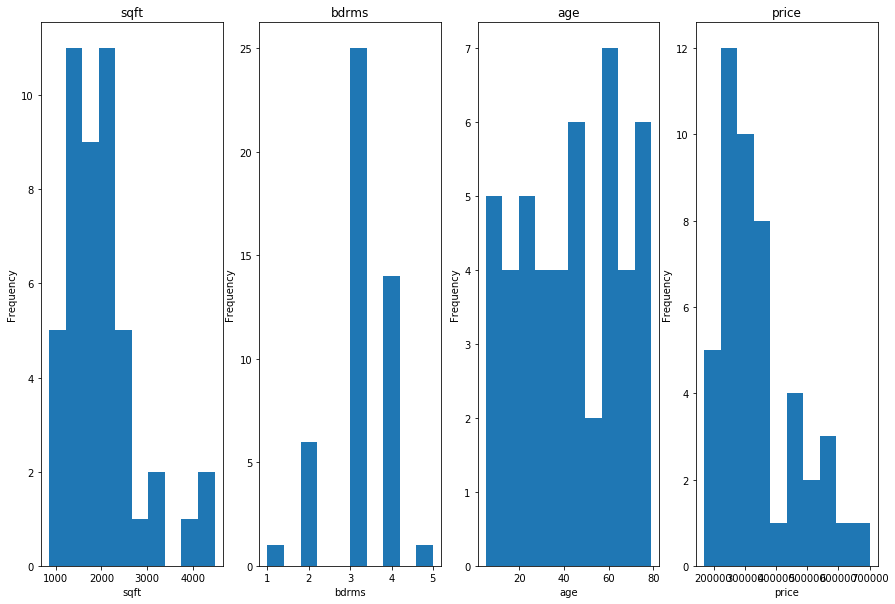

In [6]:
# plot the histograms for each feature

plt.figure(figsize = (15, 10))

for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i + 1)
    df[feature].plot(kind = 'hist', title = feature)
    plt.xlabel(feature);

In [7]:
# create 2 variables called X and y
# X shall be a matrix with 3 columns(sqft, bdrms, age)
# and y shall be a vector with 1 column(price)

X = df[['sqft', 'bdrms', 'age']].values

y_true = df[['price']].values

In [8]:
X[:10]

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15]], dtype=int64)

In [9]:
y_true[:10]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500]], dtype=int64)

In [11]:
# create a linear regression model in Keras
# with the appropriate number of inputs and output

model = Sequential()

In [13]:
model.add(Dense(1, input_shape = (3, )))

In [15]:
model.compile(Adam(lr = 0.8), 'mean_squared_error')

In [17]:
model.fit(X, y_true, epochs = 40)

Epoch 1/40
47/47 [==============================] - 0s 85us/step - loss: 4686185036.2553
Epoch 2/40
47/47 [==============================] - 0s 105us/step - loss: 4683319459.4043
Epoch 3/40
47/47 [==============================] - 0s 85us/step - loss: 4689237819.9149
Epoch 4/40
47/47 [==============================] - 0s 64us/step - loss: 4708860241.7021
Epoch 5/40
47/47 [==============================] - 0s 64us/step - loss: 4717898686.6383
Epoch 6/40
47/47 [==============================] - 0s 64us/step - loss: 4698729493.7872
Epoch 7/40
47/47 [==============================] - 0s 64us/step - loss: 4770263944.1702
Epoch 8/40
47/47 [==============================] - 0s 64us/step - loss: 4702600202.8936
Epoch 9/40
47/47 [==============================] - 0s 64us/step - loss: 4701296738.0426
Epoch 10/40
47/47 [==============================] - 0s 64us/step - loss: 4691179345.7021
Epoch 11/40
47/47 [==============================] - 0s 63us/step - loss: 4723157580.2553
Epoch 12/40
47/47 

In [18]:
y_pred = model.predict(X)

y_pred[:10]

array([[359668.9 ],
       [266986.25],
       [400413.25],
       [242693.44],
       [505888.8 ],
       [338305.4 ],
       [252012.48],
       [246902.17],
       [227700.22],
       [246367.77]], dtype=float32)

In [19]:
# split the data into train and test with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2)

In [20]:
len(X_train)

37

In [21]:
len(X_test)

10

In [22]:
len(X)

47

In [23]:
model.fit(X_train, y_train, epochs = 50, verbose = 0)

In [24]:
y_train_pred = model.predict(X_train).ravel()

y_test_pred = model.predict(X_test).ravel()

y_train_pred[:10], y_test_pred[:10]

(array([181696.3 , 289496.8 , 222627.31, 254875.  , 328120.6 , 444658.75,
        368884.47, 204796.69, 301502.84, 318245.25], dtype=float32),
 array([663043.5 , 270694.12, 322495.56, 226154.1 , 360550.1 , 226344.77,
        378157.34, 149487.44, 221560.31, 303132.53], dtype=float32))

In [25]:
# check the R2score on training and test set (probably very bad)

y_train_pred = model.predict(X_train)

y_test_pred  = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.659
The R2 score on the Test set is:	0.563


In [26]:
y_train_pred[:10], y_test_pred[:10]

(array([[181696.3 ],
        [289496.8 ],
        [222627.31],
        [254875.  ],
        [328120.6 ],
        [444658.75],
        [368884.47],
        [204796.69],
        [301502.84],
        [318245.25]], dtype=float32), array([[663043.5 ],
        [270694.12],
        [322495.56],
        [226154.1 ],
        [360550.1 ],
        [226344.77],
        [378157.34],
        [149487.44],
        [221560.31],
        [303132.53]], dtype=float32))

In [27]:
# train the model on the training set and check its accuracy on training and test set

# how's your model doing? Is the loss growing smaller?

model.fit(X_train, y_train)

Epoch 1/1
37/37 [==============================] - 0s 135us/step - loss: 4650708120.2162


In [28]:
df['price'].min()

169900

In [29]:
df['price'].max()

699900

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bdrms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
age,47.0,42.744681,22.873440,5.0,24.5,44.0,61.5,79.0
price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


In [31]:
# try to improve your model with these experiments:
#     - normalize the input features with one of the rescaling techniques mentioned above
#     - use a different value for the learning rate of your model
#     - use a different optimizer

df['sqft1000']  = df['sqft'] / 1000.0

df['age10']     = df['age'] / 10.0

df['price100k'] = df['price'] / 1e5

In [32]:
X      = df[['sqft1000', 'bdrms', 'age10']].values

y_true = df['price100k'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2)

In [34]:
model = Sequential()

model.add(Dense(1, input_dim = 3))

model.compile(Adam(lr = 0.1), 'mean_squared_error')

model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
37/37 [==============================] - 0s 3ms/step - loss: 6.4318
Epoch 2/20
37/37 [==============================] - 0s 135us/step - loss: 2.5776
Epoch 3/20
37/37 [==============================] - 0s 81us/step - loss: 3.3820
Epoch 4/20
37/37 [==============================] - 0s 54us/step - loss: 3.2039
Epoch 5/20
37/37 [==============================] - 0s 162us/step - loss: 2.1131
Epoch 6/20
37/37 [==============================] - 0s 81us/step - loss: 1.7488
Epoch 7/20
37/37 [==============================] - 0s 81us/step - loss: 1.6927
Epoch 8/20
37/37 [==============================] - 0s 162us/step - loss: 1.4465
Epoch 9/20
37/37 [==============================] - 0s 108us/step - loss: 1.2152
Epoch 10/20
37/37 [==============================] - 0s 81us/step - loss: 1.2853
Epoch 11/20
37/37 [==============================] - 0s 162us/step - loss: 1.3911
Epoch 12/20
37/37 [==============================] - 0s 135us/step - loss: 1.2544
Epoch 13/20
37/37 [=============

In [35]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)

y_test_pred  = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.471
The R2 score on the Test set is:	0.679


In [52]:
model.fit(X_train, y_train, epochs = 40, verbose = 0)

In [53]:
# once you're satisfied with training, check the R2score on the test set

y_train_pred = model.predict(X_train)

y_test_pred  = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.723
The R2 score on the Test set is:	0.708


---------------

# Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

# Solution 2

In [54]:
# load the dataset and inspect it with `.head()`, `.info()` and `.describe()`.

HR = pd.read_csv('HR_comma_sep.csv')

df = HR.copy()

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [59]:
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

df.left.value_counts() / len(df)

# Predicting 0 all the time would yield an accuracy of 76%

0    0.761917
1    0.238083
Name: left, dtype: float64

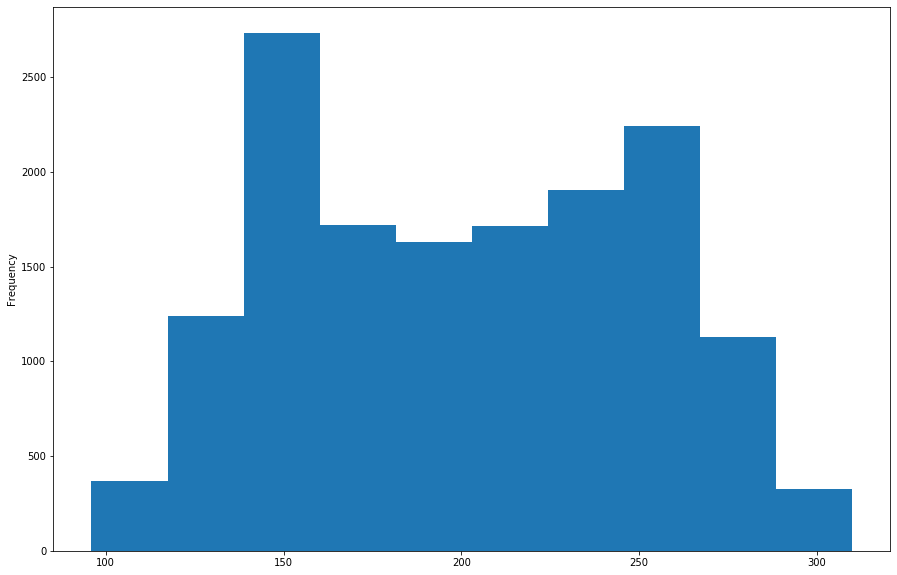

In [61]:
# Check if any feature needs rescaling.
# You may plot a histogram of the feature to decide which rescaling method is 
# more appropriate.

df['average_montly_hours'].plot(kind = 'hist', figsize = (15, 10));

In [63]:
df['average_montly_hours_100'] = df['average_montly_hours'] / 100.0

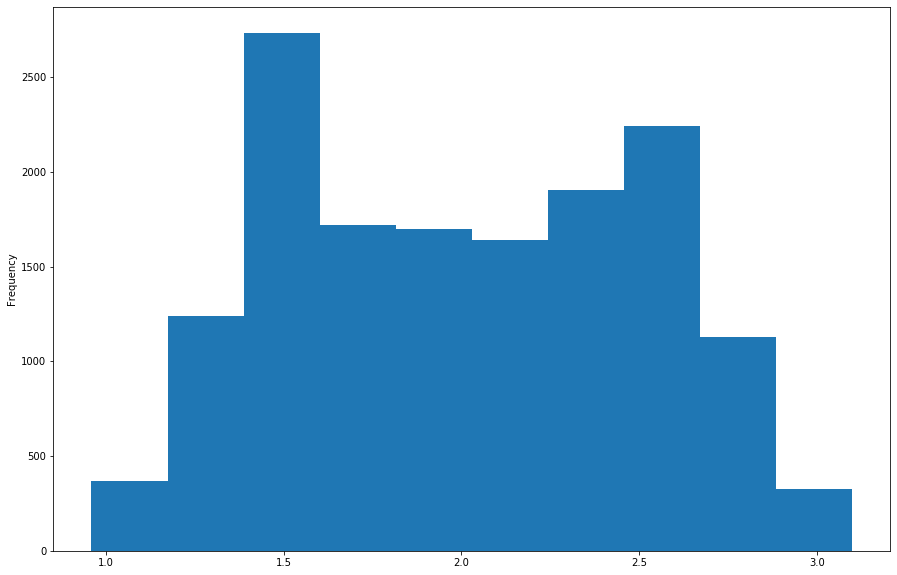

In [66]:
df['average_montly_hours_100'].plot(kind = 'hist', figsize = (15, 10));

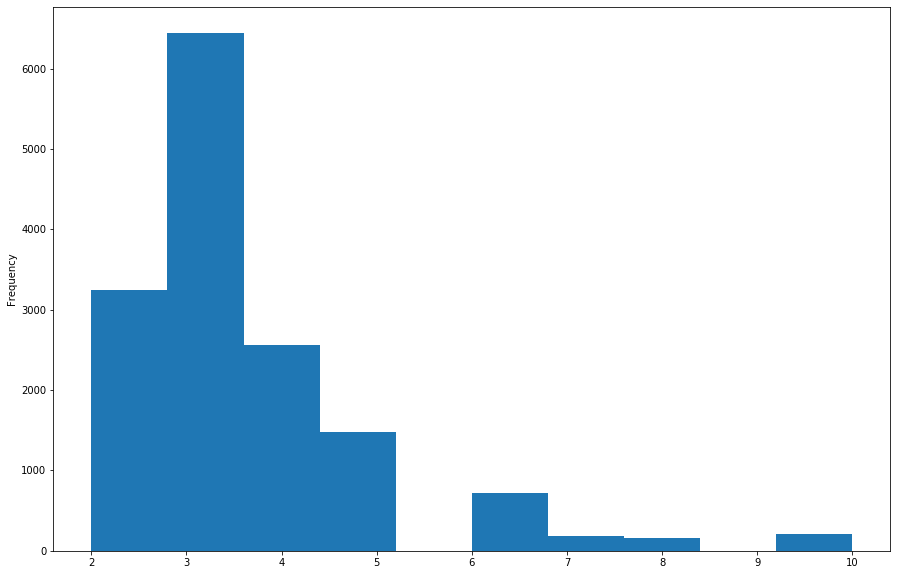

In [67]:
df['time_spend_company'].plot(kind = 'hist', figsize = (15, 10));

In [68]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.

df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [69]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [70]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [74]:
X = pd.concat([df[['satisfaction_level', 
                   'last_evaluation', 
                   'number_project',
                   'time_spend_company', 
                   'Work_accident',
                   'promotion_last_5years', 
                   'average_montly_hours_100']],
               df_dummies], axis = 1).values

y = df['left'].values

In [75]:
X.shape

(14999, 20)

In [76]:
y.shape

(14999,)

In [77]:
# do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [79]:
# play around with learning rate and optimizer

model = Sequential()

model.add(Dense(1, input_dim = 20, activation = 'sigmoid'))

model.compile(Adam(lr = 0.5), 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train, y_train)

Epoch 1/1
11999/11999 [==============================] - 0s 40us/step - loss: 0.5431 - acc: 0.7646


In [82]:
y_test_pred = model.predict_classes(X_test)

y_test_pred[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [83]:
def pretty_confusion_matrix(y_true, y_pred, labels = ["False", "True"]):
    cm          = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df          = pd.DataFrame(cm, index = labels, columns = pred_labels)
    return df

In [84]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels = ['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1949,349
Leave,338,364


In [85]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2298
           1       0.51      0.52      0.51       702

    accuracy                           0.77      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.77      0.77      0.77      3000



In [88]:
# check if you still get the same results,
# if you use a 5-Fold cross validation on all the data

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim = 20, activation = 'sigmoid'))
    model.compile(Adam(lr = 0.5), 'binary_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = build_logistic_regression_model,
                        epochs = 10, 
                        verbose = 0
                       )

In [89]:
cv = KFold(5, shuffle = True)

scores = cross_val_score(model, X, y, cv = cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7785 ± 0.0146


In [90]:
scores

array([0.776     , 0.775     , 0.79666667, 0.75433333, 0.79026342])

In [91]:
# Is the model good enough for your boss?

# No, the model is not good enough for my boss, 
# since it performs no better than the benchmark.

----------------